<a href="https://colab.research.google.com/github/shubhamJU2022/Olympic-Data-Analysis/blob/main/Olympic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Step 1: Importing libraries

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Step 2: Understanding database  
    
When dealing with Olympic data, we have two CSV files. 
One containing outturn sports-related costs of the Olympic Games of all years. 
And other is containing the information about athletes of all years when they participated with information.

In [ ]:
#We imported both the datasets using the .read_csv() method into a dataframe using pandas and displayed the first 5 rows of each dataset.

data = pd.read_csv('athlete_events.csv') # read file

# data.head() display first 5 entry
# data.describe describe about model
# data.info give info about data
print(data.head(), data.describe(), data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A 

In [ ]:
Step 4: Merging two DataFrame
Here we are going to merge two dataframe using pandas.merge() in python.

In [ ]:
# regions and country noc data csv file
regions = pd.read_csv('datasets_31029_40943_noc_regions.csv')
print(regions.head())

# merging to data and regions frame
merged = pd.merge(data, regions, on='NOC', how='left')
print(merged.head())


   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer

In [ ]:
#Data analysis of Gold medalists

#Creating a new data frame including only gold medalists.

# creating goldmedal dataframes
goldMedals = merged[(merged.Medal == 'Gold')]
print(goldMedals.head())


    ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal   region notes  
3        Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42  Gymnastics Men's

In [ ]:
Gold medalist in respect of age:


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


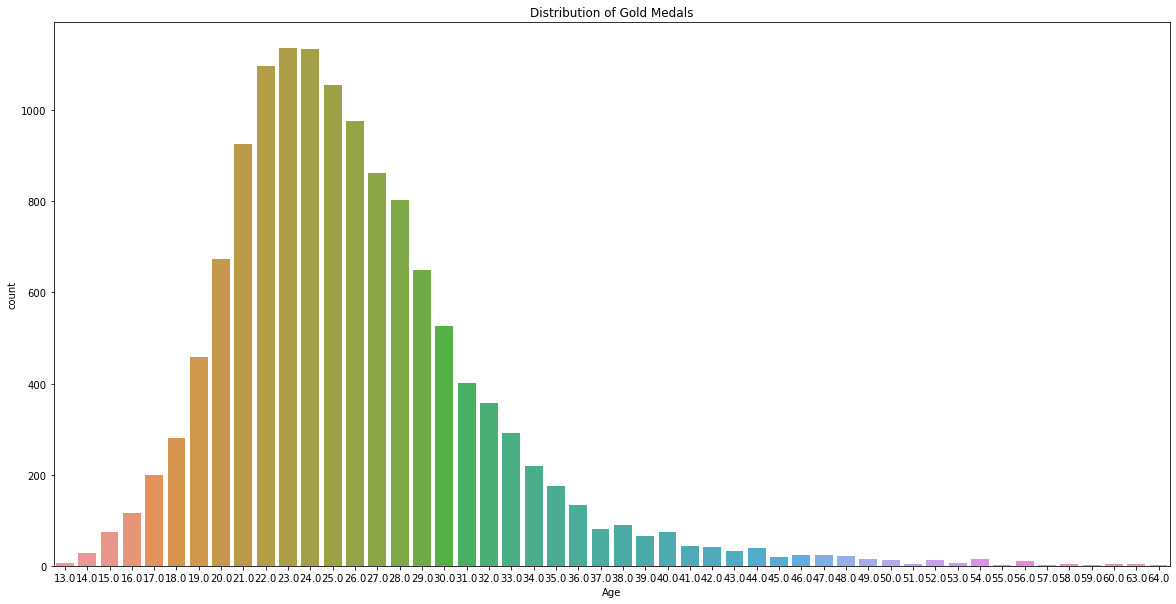

In [ ]:
#Here we are going to create a graph of the number of gold medals with respect to age.
#For this, we will create countplot for graph representation which shows the X-axis as the age of the players and 
#the Y-axis represent the number of medals.


plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(goldMedals['Age'])
plt.show()


In [ ]:
#Print the number of athletes who are gold medalists and whose age is greater than 50 with their info.

goldMedals = merged[(merged.Medal == 'Gold')]
print('The no of athletes is',
	goldMedals['ID'][goldMedals['Age'] > 50].count(), '\n')
print(goldMedals[goldMedals['Age'] > 50])


The no of athletes is 65 

            ID                           Name Sex   Age  Height  Weight  \
5078      2894         Derek Swithin Allhusen   M  54.0   180.0    71.0   
7961      4404             Johan August Anker   M  56.0     NaN     NaN   
13394     7272     Nikolaus "Klaus" Balkenhol   M  52.0   178.0    83.0   
13396     7272     Nikolaus "Klaus" Balkenhol   M  56.0   178.0    83.0   
24897    13033  Gustaf Adolf Boltenstern, Jr.   M  52.0     NaN     NaN   
...        ...                            ...  ..   ...     ...     ...   
261102  130662        Robert W. Williams, Jr.   M  63.0     NaN     NaN   
261671  130936                  Walter Winans   M  56.0     NaN     NaN   
261675  130936                  Walter Winans   M  60.0     NaN     NaN   
262865  131533       Emily Woodruff (Smiley-)   F  58.0     NaN     NaN   
266293  133226       Mahonri Mackintosh Young   M  54.0     NaN     NaN   

                      Team  NOC        Games  Year  Season         City 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


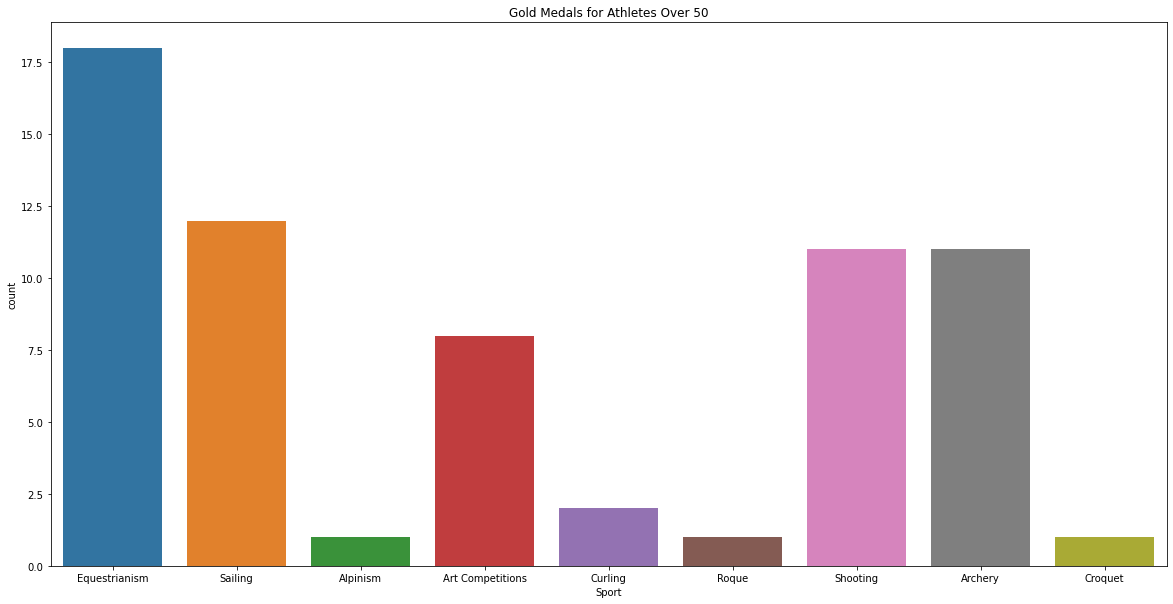

In [ ]:
#Creating a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it

masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')
plt.show()


In [ ]:
Women who can play in summer


     ID                                Name Sex   Age  Height  Weight  \
26    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
27    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
32   13                  Minna Maarit Aalto   F  30.0   159.0    55.5   
33   13                  Minna Maarit Aalto   F  34.0   159.0    55.5   
79   21           Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   
80   22                       Andreea Aanei   F  22.0   170.0   125.0   
91   29                Willemien Aardenburg   F  22.0     NaN     NaN   
105  37                  Ann Kristin Aarnes   F  23.0   182.0    64.0   
135  49                        Moonika Aava   F  24.0   168.0    65.0   
136  49                        Moonika Aava   F  28.0   168.0    65.0   

            Team  NOC        Games  Year  Season            City  \
26   Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
27   Netherlands  NED  1932 Summer  1932  Summer     Los Ang

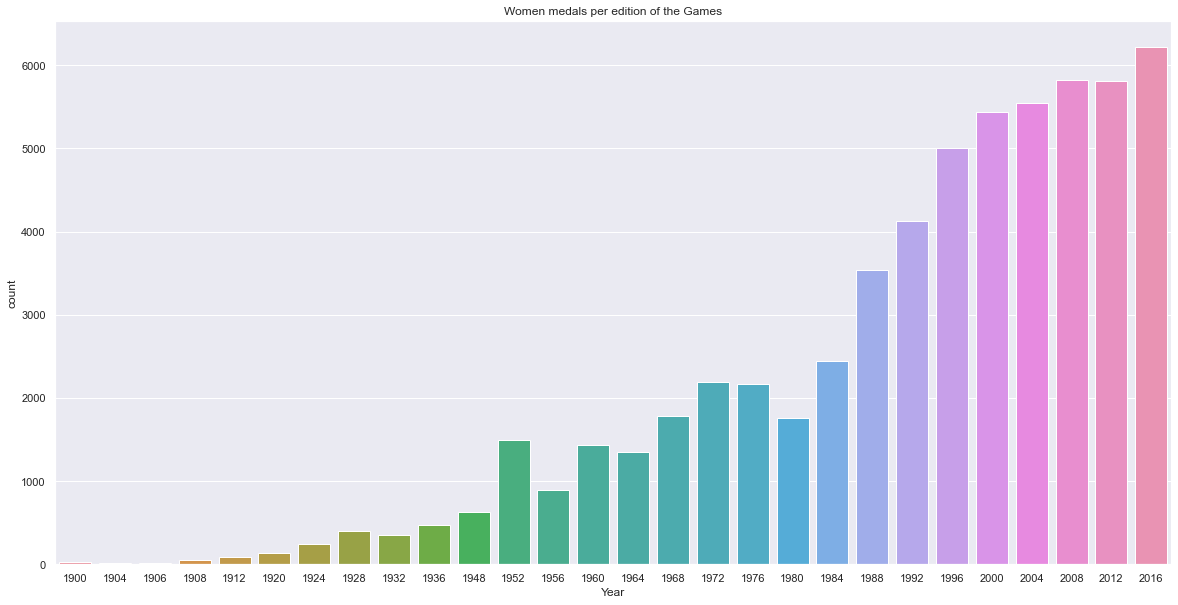

In [ ]:
##Display all women athletes who have played in the summer season and it show the increase in women athletes after a long period via graphical representation.

womenInOlympics = merged[(merged.Sex == 'F') &
(merged.Season == 'Summer')]
print(womenInOlympics.head(10))

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')
plt.show()


In [ ]:
Top  5 countries who won the most medals

     index  Medal
0      USA   2638
1   Russia   1599
2  Germany   1301
3       UK    678
4    Italy    575


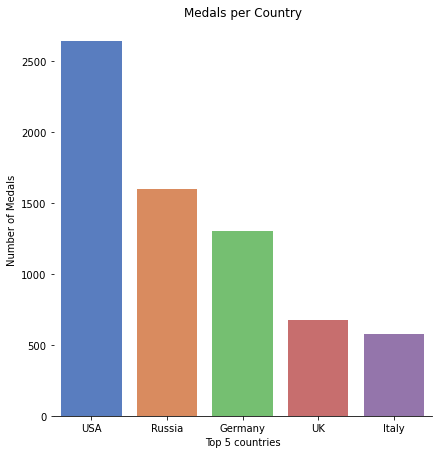

In [ ]:
#Here we are going to print the top 5 countries and show them in the graph with catplot.

print(goldMedals.region.value_counts().reset_index(name='Medal').head())
  
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')
plt.show()


In [ ]:
Players weight Analysis

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


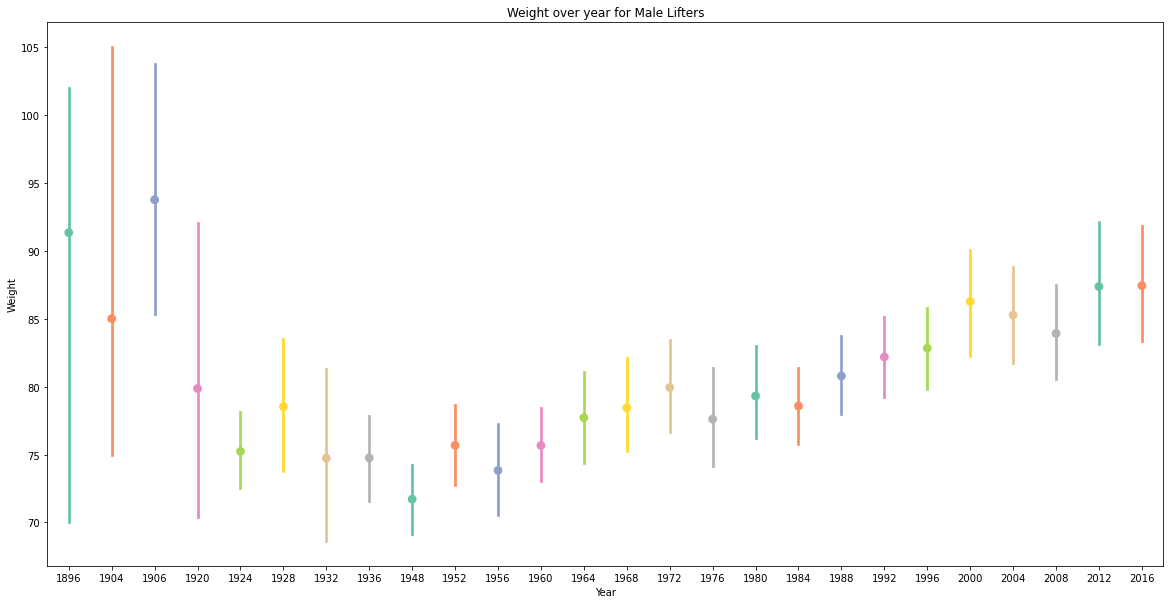

In [ ]:
#Here we are going to see how weight over year for Male Lifters via graphical representation using pointplot.

MenOverTime = merged[(merged.Sex == 'M') &
(merged.Season == 'Summer')]
wlMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Weightlifting']

plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=wlMenOverTime, palette='Set2')
plt.title('Weight over year for Male Lifters')
plt.show()
